# Prepare Company Profiles

In [2]:
#import CompanyProfiles
import numpy as np
import pandas as pd
CompanyProfiles = pd.read_csv('CompanyProfiles.csv',index_col="symbol",
    dtype={
        "row_numbr":int,
        "price":str,
        "beta":str,
        "volAvg":str,
        "mktCap":str,
        "lastDiv":str,
        "range":str,
        "changes":str,
        "companyName":str,
        "currency":str,
        "cik":str,
        "isin":str,
        "cusip":str,
        "exchange":str,
        "exchangeShortName":str,
        "industry":str,
        "website":str,
        "description":str,
        "ceo":str,
        "sector":str,
        "country":str,
        "fullTimeEmployees":str,
        "phone":str,
        "address":str,
        "city":str,
        "state":str,
        "zip":str,
        "dcfDiff":str,
        "dcf":str,
        "image":str,
        "ipoDate":str,
        "defaultImage":bool,
        "isEtf":bool,
        "isActivelyTrading":bool,
        "isAdr":bool,
        "isFund":bool
    })

In [ ]:
#drop columns we don't need
#will return an error if run again, because we have removed these columns from the csv now.
CompanyProfiles.drop(columns = ["row_numbr","price","beta","volAvg","mktCap","lastDiv","range","changes","cik","isin","cusip","exchange","exchangeShortName","website","description","ceo","fullTimeEmployees","phone","address","dcfDiff","dcf","image","defaultImage","isActivelyTrading"],inplace=True)

In [ ]:
#drop columns that we don't really need and have lots of null values
#will return an error if run again, because we have removed these columns from the csv now.
CompanyProfiles.drop(columns = ["city","state","zip"],inplace=True)

In [ ]:
#drop ETF, ADR, and Funds
#will return an error if run again, because we have removed these columns from the csv now.
CompanyProfiles = CompanyProfiles[CompanyProfiles["isEtf"] == False]
CompanyProfiles = CompanyProfiles[CompanyProfiles["isAdr"] == False]
CompanyProfiles = CompanyProfiles[CompanyProfiles["isFund"] == False]
CompanyProfiles.drop(columns = ["isEtf","isAdr","isFund"],inplace=True)

In [11]:
#print number of missing values
print(CompanyProfiles.isnull().sum())

companyName       2
currency          0
industry        363
sector          761
country           0
ipoDate        4451
dtype: int64


In [6]:
CompanyProfiles.to_csv("CompanyProfiles.csv")

# Applying Exchange Rates
##### Converting all StockPrices, CashFlows, IncomeStatements, and BalanceSheets monetary information to USD equivalent using exchange rates. Drop any records without a corresponding exchange rate entry. We need to make this conversion to stock for purchasing advisement effects. We need to convert the rest of the data, because many companies switch their reported currencies over time. 

##### Company Profiles have the currency for the stock data, but other data has the reported currency for their data contained within the tables. These currencies may differ.

In [7]:
# run "Gather, Edit, and Apply Exchange Rates" notebook

# Import Converted Data And Join It Together

In [4]:
#used brute force fore loops for finding why dates were not parsing correctly for IncomeStatements and BalanceSheets
#date given (1633-08-19) has entry error for first entry of company BJ in Income Statements and BalanceSheets. Cannot tell what date was supposed to be. I deleted this unnecessary row manually.

In [5]:
#Found IncomeStatement errors found at rows [369935, 552761, 788963] - repeated header for some reason. Perhaps headers included accidentally when retrieving data from FMP cloud. Manually deleted extra headers
#used brute force for loops to identify the problem rows

In [ ]:
#import data
import numpy as np
import pandas as pd
StockPrices = pd.read_csv("ConvertedStockPrices.csv",index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})

In [7]:
CashFlows = pd.read_csv("ConvertedCashFlows.csv",index_col=["symbol","date"],parse_dates=["date"],
    dtype={
        "row_numbr":int,
        "reportedCurrency":str,
        "netIncome":float,
        "depreciationAndAmortization":float,
        "deferredIncomeTax":float,
        "stockBasedCompensation":float,
        "changeInWorkingCapital":float,
        "accountsReceivables":float,
        "inventory":float,
        "accountsPayables":float,
        "otherWorkingCapital":float,
        "otherNonCashItems":float,
        "netCashProvidedByOperatingActivities":float,
        "investmentsInPropertyPlantAndEquipment":float,
        "acquisitionsNet":float,
        "purchasesOfInvestments":float,
        "salesMaturitiesOfInvestments":float,
        "otherInvestingActivites":float,
        "netCashUsedForInvestingActivites":float,
        "debtRepayment":float,
        "commonStockIssued":float,
        "commonStockRepurchased":float,
        "dividendsPaid":float,
        "otherFinancingActivites":float,
        "netCashUsedProvidedByFinancingActivities":float,
        "effectOfForexChangesOnCash":float,
        "netChangeInCash":float,
        "cashAtEndOfPeriod":float,
        "cashAtBeginningOfPeriod":float,
        "operatingCashFlow":float,
        "capitalExpenditure":float,
        "freeCashFlow":float,
    })
IncomeStatements = pd.read_csv("ConvertedIncomeStatements.csv",index_col=["symbol","date"],parse_dates=["date"],
   dtype={
        "reportedCurrency":str,
        "revenue":float,
        "costOfRevenue":float,
        "grossProfit":float,
        "grossProfitRatio":float,
        "researchAndDevelopmentExpenses":float,
        "generalAndAdministrativeExpenses":float,
        "sellingAndMarketingExpenses":float,
        "sellingGeneralAndAdministrativeExpenses":float,
        "otherExpenses":float,
        "operatingExpenses":float,
        "costAndExpenses":float,
        "interestExpense":float,
        "depreciationAndAmortization":float,
        "ebitda":float,
        "ebitdaratio":float,
        "operatingIncome":float,
        "operatingIncomeRatio":float,
        "totalOtherIncomeExpensesNet":float,
        "incomeBeforeTax":float,
        "incomeBeforeTaxRatio":float,
        "incomeTaxExpense":float,
        "netIncome":float,
        "netIncomeRatio":float,
        "eps":float,
        "epsdiluted":float,
        "weightedAverageShsOut":float,
        "weightedAverageShsOutDil":float,
   })
BalanceSheets = pd.read_csv("ConvertedBalanceSheets.csv",index_col=["symbol","sheet_date"],parse_dates=["sheet_date"],
    dtype={  
        "reportedCurrency":str,
        "cashAndCashEquivalents":float,
        "shortTermInvestments":float,
        "cashAndShortTermInvestments":float,
        "netReceivables":float,
        "inventory":float,
        "otherCurrentAssets":float,
        "totalCurrentAssets":float,
        "propertyPlantEquipmentNet":float,
        "goodwill":float,
        "intangibleAssets":float,
        "goodwillAndIntangibleAssets":float,
        "longTermInvestments":float,
        "taxAssets":float,
        "otherNonCurrentAssets":float,
        "totalNonCurrentAssets":float,
        "otherAssets":float,
        "totalAssets":float,
        "accountPayables":float,
        "shortTermDebt":float,
        "taxPayables":float,
        "deferredRevenue":float,
        "otherCurrentLiabilities":float,
        "totalCurrentLiabilities":float,
        "longTermDebt":float,
        "deferredRevenueNonCurrent":float,
        "deferredTaxLiabilitiesNonCurrent":float,
        "otherNonCurrentLiabilities":float,
        "totalNonCurrentLiabilities":float,
        "otherLiabilities":float,
        "totalLiabilities":float,
        "commonStock":float,
        "retainedEarnings":float,
        "accumulatedOtherComprehensiveIncomeLoss":float,
        "othertotalStockholdersEquity":float,
        "totalStockholdersEquity":float,
        "totalLiabilitiesAndStockholdersEquity":float,
        "totalInvestments":float,
        "totalDebt":float,
        "netDebt":float,
    })

In [8]:
#The only companies whose stock information we care about remain in all our datasets. We can eliminate data that correspond to companies not in this table.

#stock prices
#temp DF to merge to get rid of symbols not wanted. This is an efficient way to eliminate symbols not wanted
tempStockPricesEmptyDf = pd.DataFrame({},index=StockPrices.index.get_level_values(0).unique())
tempStockPricesEmptyDf.index.rename("symbol",inplace=True)

CompanyProfiles = CompanyProfiles.join(tempStockPricesEmptyDf,how="inner")
CashFlows = CashFlows.join(tempStockPricesEmptyDf,how="inner")
IncomeStatements = IncomeStatements.join(tempStockPricesEmptyDf,how="inner")
BalanceSheets = BalanceSheets.join(tempStockPricesEmptyDf,how="inner")

#companyProfiles
tempCompanyProfileEmptyDf = pd.DataFrame({},index=CompanyProfiles.index.values)
tempCompanyProfileEmptyDf.index.rename("symbol",inplace=True)

CashFlows = CashFlows.join(tempCompanyProfileEmptyDf,how="inner")
StockPrices = StockPrices.join(tempCompanyProfileEmptyDf,how="inner")
IncomeStatements = IncomeStatements.join(tempCompanyProfileEmptyDf,how="inner")
BalanceSheets = BalanceSheets.join(tempCompanyProfileEmptyDf,how="inner")


#CashFlows
tempDf = pd.DataFrame({},CashFlows.index.get_level_values(0).unique())
tempDf.index.rename("symbol",inplace=True)

CompanyProfiles = CompanyProfiles.join(tempDf,how="inner")
StockPrices = StockPrices.join(tempDf,how="inner")
IncomeStatements = IncomeStatements.join(tempDf,how="inner")
BalanceSheets = BalanceSheets.join(tempDf,how="inner")

#BalanceSheets
tempDf = pd.DataFrame({},BalanceSheets.index.get_level_values(0).unique())
tempDf.index.rename("symbol",inplace=True)

CompanyProfiles = CompanyProfiles.join(tempDf,how="inner")
StockPrices = StockPrices.join(tempDf,how="inner")
IncomeStatements = IncomeStatements.join(tempDf,how="inner")
CashFlows = CashFlows.join(tempDf,how="inner")

#IncomeStatements
tempDf = pd.DataFrame({},IncomeStatements.index.get_level_values(0).unique())
tempDf.index.rename("symbol",inplace=True)

CompanyProfiles = CompanyProfiles.join(tempDf,how="inner")
StockPrices = StockPrices.join(tempDf,how="inner")
BalanceSheets = BalanceSheets.join(tempDf,how="inner")
CashFlows = CashFlows.join(tempDf,how="inner")

NameError: name 'CompanyProfiles' is not defined

# Extend the ranges of Stock Prices and fill in missing data with backfill (e.g. weekend prices were not listed, but now are listed with Friday's close price)

In [432]:
#Long time to run 5.7 hours last time. Final refactor
#I've tried my best to refactor, but we need to continue on and the other steps are only more computationally intensive.
import time
StockPrices["date1"] = StockPrices.index.get_level_values(1).values
StockPrices = StockPrices.sort_index()
newStockPrices = pd.DataFrame({},index=[])
symbols = StockPrices.index.get_level_values(0).unique()
length = symbols.shape[0]
lengthDiv100 = length/100
i = 0
last_percent = 0
t1 = time.monotonic()
while i < length:
    symbol = symbols.values[i]
    days = pd.date_range(start=StockPrices.loc[symbol].iat[0,1],end=StockPrices.loc[symbol].iat[-1,1])  
    NewIndex = pd.Index(days,name="date")
    tempDF2 = StockPrices.loc[symbol].reindex(NewIndex).reset_index()
    tempDF2["symbol"] = [symbol]*tempDF2.shape[0]  
    newStockPrices = newStockPrices.append(tempDF2)
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)
newStockPrices = newStockPrices.set_index(["symbol","date"])
newStockPrices = newStockPrices.fillna(method="pad",axis=0)
StockPrices = newStockPrices

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0
percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
pe

In [434]:
newStockPrices.to_csv("newStockPrices.csv")

# Get the Percent Change over the next month for a stock price

In [4]:
#import data
import numpy as np
import pandas as pd
StockPrices = pd.read_csv("newStockPrices.csv",index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})


In [470]:
StockPrices.drop(columns=["date1"],inplace=True)

In [436]:
StockPrices["percent_change_over_next_month"] = None

In [474]:
#final refactor #still takes about 3 hours
IndexValues = StockPrices.index.values
t1 = time.monotonic()
length = StockPrices.shape[0]
lengthDiv100 = length/100
i = 0
last_percent = 0
t1 = time.monotonic()
while i < length:
    try:
        StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=1)),"close"] / StockPrices.iat[i,0] - 1
    except KeyError:
        None
        #StockPrices.iloc[i].at["percent_change_over_next_month"] = None
    #except ValueError:
        #StockPrices.iloc[i].at["percent_change_over_next_month"] = None
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0


<ipython-input-474-b8c8920db763>:11: RuntimeWarning: divide by zero encountered in double_scalars
  StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=1)),"close"] / StockPrices.iat[i,0] - 1
<ipython-input-474-b8c8920db763>:11: RuntimeWarning: invalid value encountered in double_scalars
  StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=1)),"close"] / StockPrices.iat[i,0] - 1


percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
percent done: 54.0
percent done: 55.0
percent done: 56.0
percent done: 57.0
percent done: 58.0
percent done: 59.0
percent done: 60.0
percent done: 61.0
percent done: 62.0
percent done: 63.0
percent done: 64.0
percent done: 65.0
percent done

In [478]:
#get rid of null "percent over next month" rows
StockPrices = StockPrices[StockPrices.notnull()["percent_change_over_next_month"]]

In [24]:
StockPrices.drop(columns=["close"],inplace=True)

In [26]:
#save data
StockPrices.to_csv('BrandNewStockPrices2.csv')

# Get the Percent Change over the next quarter for a stock price

In [4]:
#import data
import numpy as np
import pandas as pd
StockPrices = pd.read_csv("newStockPrices.csv",index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})


In [7]:
StockPrices.drop(columns=["date1"],inplace=True)

In [8]:
StockPrices["percent_change_over_next_quarter"] = None

In [ ]:
IndexValues = StockPrices.index.values

In [10]:
#final refactor #still takes about 3 hours
import time
t1 = time.monotonic()
length = StockPrices.shape[0]
lengthDiv100 = length/100
i = 0
last_percent = 0
t1 = time.monotonic()
while i < length:
    try:
        StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=3)),"close"] / StockPrices.iat[i,0] - 1
    except KeyError:
        None
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0


<ipython-input-10-6bb2ff69f755>:11: RuntimeWarning: divide by zero encountered in double_scalars
  StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=3)),"close"] / StockPrices.iat[i,0] - 1
<ipython-input-10-6bb2ff69f755>:11: RuntimeWarning: invalid value encountered in double_scalars
  StockPrices.iat[i,1] = StockPrices.at[(IndexValues[i][0],IndexValues[i][1] + pd.DateOffset(months=3)),"close"] / StockPrices.iat[i,0] - 1


percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
percent done: 54.0
percent done: 55.0
percent done: 56.0
percent done: 57.0
percent done: 58.0
percent done: 59.0
percent done: 60.0
percent done: 61.0
percent done: 62.0
percent done: 63.0
percent done: 64.0
percent done: 65.0
percent done

In [12]:
#get rid of null "percent over next month" rows
StockPrices = StockPrices[StockPrices.notnull()["percent_change_over_next_quarter"]]

In [26]:
StockPrices.drop(columns=["close"],inplace=True)

In [27]:
#save data
StockPrices.to_csv('BrandNewStockPricesQuarterly.csv')

# Join All the Company Financial Sheets and eliminate dates no longer needed
#### We perform an inner join, which should stop any nulls from appearing due to lack of overlap between dates/symbols in our data. It should also help us by shrinking our data.

In [ ]:
#import data
import numpy as np
import pandas as pd
#you can substitute the stock read here between one month ahead and quarterly
StockPrices = pd.read_csv("BrandNewStockPrices2.csv",index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})


In [10]:
#join them into CombinedDataFrame
CashFlows.drop(columns=['reportedCurrency', 'netIncome', 'depreciationAndAmortization'],inplace=True)
BalanceSheets.drop(columns=['inventory','reportedCurrency'],inplace=True)
CombinedDataFrame = CashFlows.join(IncomeStatements,on=["symbol","date"],how="inner")
CombinedDataFrame = CombinedDataFrame.join(BalanceSheets,on=["symbol","date"],how="inner")

In [11]:
#drop row_numbr and reportedCurrency
CombinedDataFrame.drop(columns=['row_numbr','reportedCurrency'],inplace=True)

#### get rid of nulls

In [20]:
#find nulls
CombinedDataFrame.isnull().sum()[CombinedDataFrame.isnull().sum()!=0]

Series([], dtype: int64)

In [ ]:
#drop nulls
CombinedDataFrame.dropna(axis=0,subset=["othertotalStockholdersEquity"],inplace=True)
CombinedDataFrame.dropna(axis=0,subset=["totalCurrentAssets"],inplace=True)
CombinedDataFrame.dropna(axis=0,subset=["totalCurrentLiabilities"],inplace=True)

In [22]:
#no nulls left
print(CombinedDataFrame.isnull().sum().sum())

0


# Shrink Stock Price Data
#### Do so by removing (the now unneeded) dates that don't have a match in the rest of our data
#### Also remove stock price data dates with less than 50 companies reporting for them, because we can't make a good rating for them using our method for rating

In [18]:
#takes a while
#eliminate symbol,date combinations no longer needed from stock Data
tempDF = pd.DataFrame({},index=CombinedDataFrame.index)
tempDF.index.rename(("symbol","date"),inplace=True)

StockPrices = StockPrices.join(tempDF,how="inner")

In [6]:
IndexValues = .index.values

In [22]:
#about 30 minutes to run
#get rid of infinite values caused by 0 price stock increasing (change to null)
import time
i=0
last_percent = 0
length = StockPrices.shape[0]
lengthDiv100 = length/100
t1 = time.monotonic()
while i < length:
    if np.isinf(StockPrices.iat[i,1]):
        StockPrices.iat[i,1] = None
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0
percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
pe

In [22]:
#drop the several null values
StockPrices.dropna(axis=0,subset=["percent_change_over_next_month"],inplace=True)

In [23]:
#remove the dates with less than 50 companies reporting stock prices, because we can't make a good rating for them.
counts = StockPrices["percent_change_over_next_month"].groupby(level=1).count()
StockPrices.drop(counts[counts<50].index.values,level="date",inplace=True)

In [32]:
#save data
StockPrices.to_csv('ReducedStockData.csv')

In [143]:
StockPrices = pd.read_csv('ReducedStockData.csv',index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})

# Perform Correlations and Get Rid of Correlated Variables

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_heatmap(df,filename):
    _ , ax = plt.subplots(figsize =(250,250))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,
        vmax=1.0, 
        linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.savefig(filename)

correlation_heatmap(CombinedDataFrame,'heatmap.jpg')

In [31]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    
    df_out = df_in[un_corr_idx].reindex(un_corr_idx)
    
    return df_out

df_out = trimm_correlated(CombinedDataFrame.corr(), 0.70)

CombinedDataFrame = CombinedDataFrame[df_out.index.values]

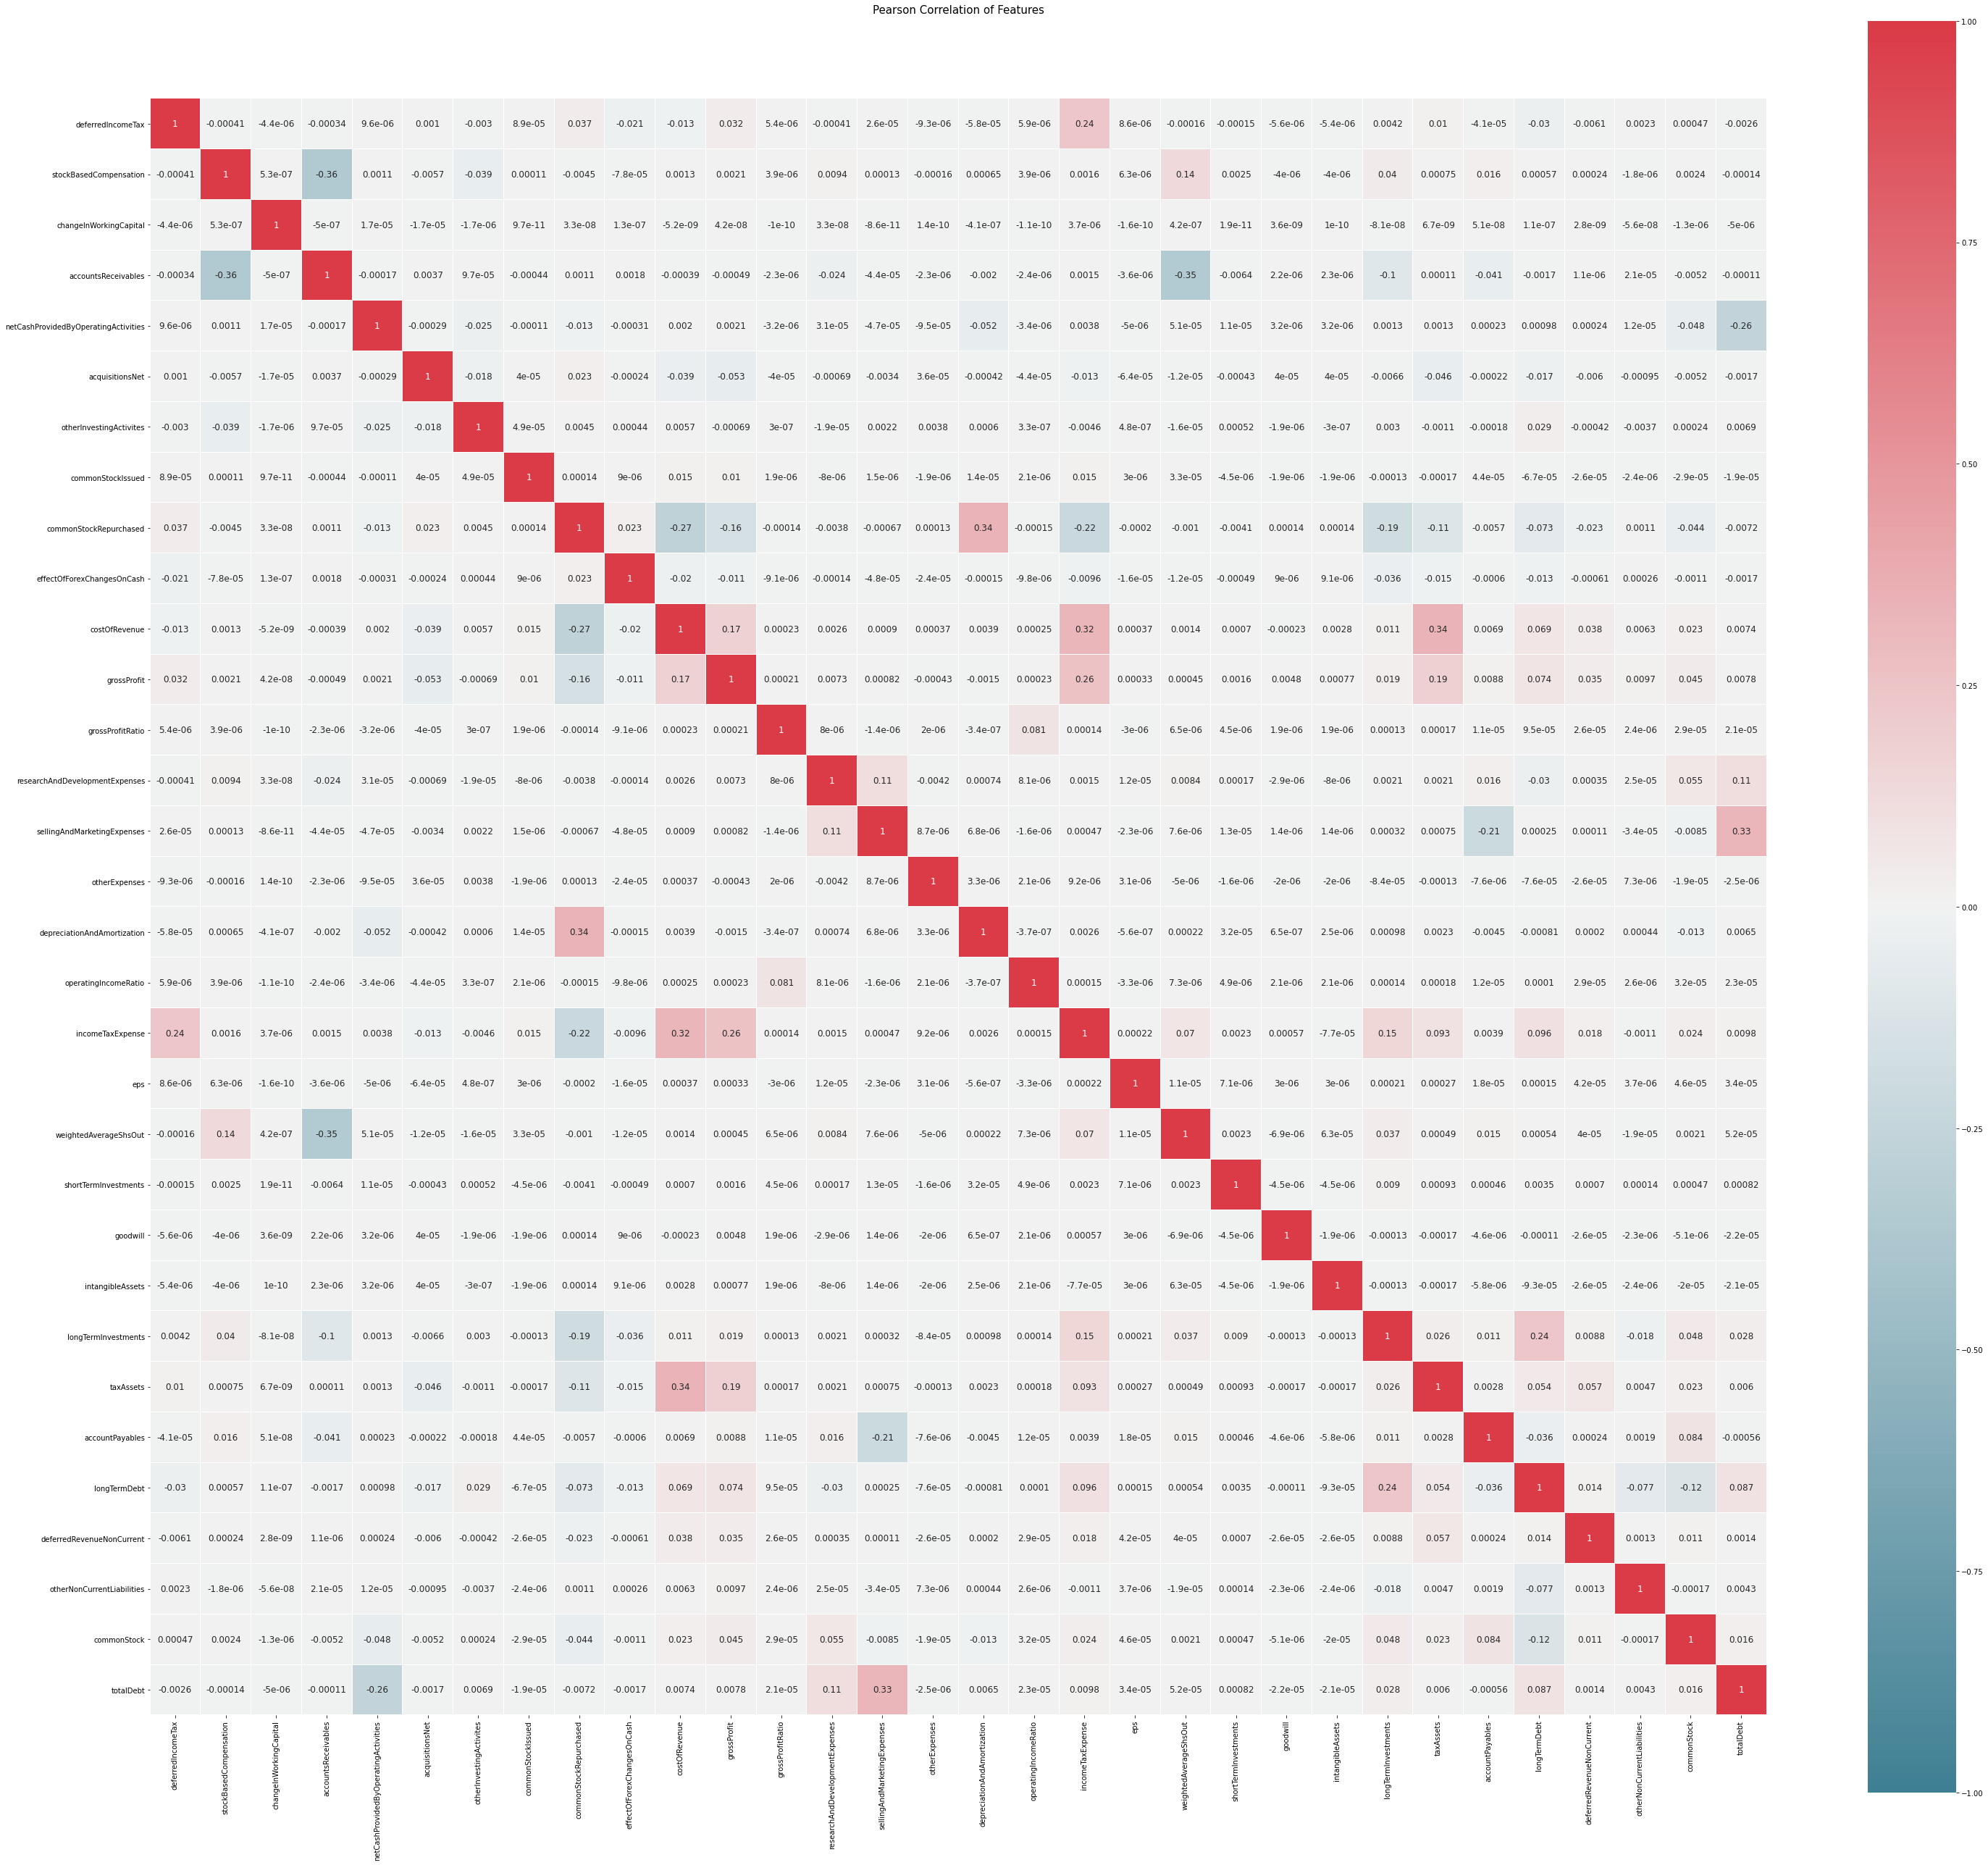

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_heatmap(df,filename):
    _ , ax = plt.subplots(figsize =(50,50))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,
        vmax=1.0,
        linecolor='white',
        annot_kws={'fontsize':12 },
        vmin=-1
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    plt.savefig(filename)

correlation_heatmap(CombinedDataFrame,'heatmaptrimmed.jpg')

# Shrink Combined Data Frame using shrunk Stock Price Data

In [33]:
#eliminate dates no longer needed from Combined Data Frame
tempDF = pd.DataFrame({},index=StockPrices.index)
tempDF.index.rename(("symbol","date"),inplace=True)

CombinedDataFrame = CombinedDataFrame.join(tempDF,how="inner")

# Save Trimmed Combined Financial Record Data

In [105]:
CombinedDataFrame.to_csv('ReducedCombinedFinancialRecords.csv')

# Plot Histograms of Combined Data

In [ ]:
#All of the histograms have one bin size that skyrockets above the others

array([[<AxesSubplot:title={'center':'deferredIncomeTax'}>,
        <AxesSubplot:title={'center':'stockBasedCompensation'}>,
        <AxesSubplot:title={'center':'changeInWorkingCapital'}>,
        <AxesSubplot:title={'center':'accountsReceivables'}>,
        <AxesSubplot:title={'center':'netCashProvidedByOperatingActivities'}>,
        <AxesSubplot:title={'center':'acquisitionsNet'}>],
       [<AxesSubplot:title={'center':'otherInvestingActivites'}>,
        <AxesSubplot:title={'center':'commonStockIssued'}>,
        <AxesSubplot:title={'center':'commonStockRepurchased'}>,
        <AxesSubplot:title={'center':'effectOfForexChangesOnCash'}>,
        <AxesSubplot:title={'center':'costOfRevenue'}>,
        <AxesSubplot:title={'center':'grossProfit'}>],
       [<AxesSubplot:title={'center':'grossProfitRatio'}>,
        <AxesSubplot:title={'center':'researchAndDevelopmentExpenses'}>,
        <AxesSubplot:title={'center':'sellingAndMarketingExpenses'}>,
        <AxesSubplot:title={'center':

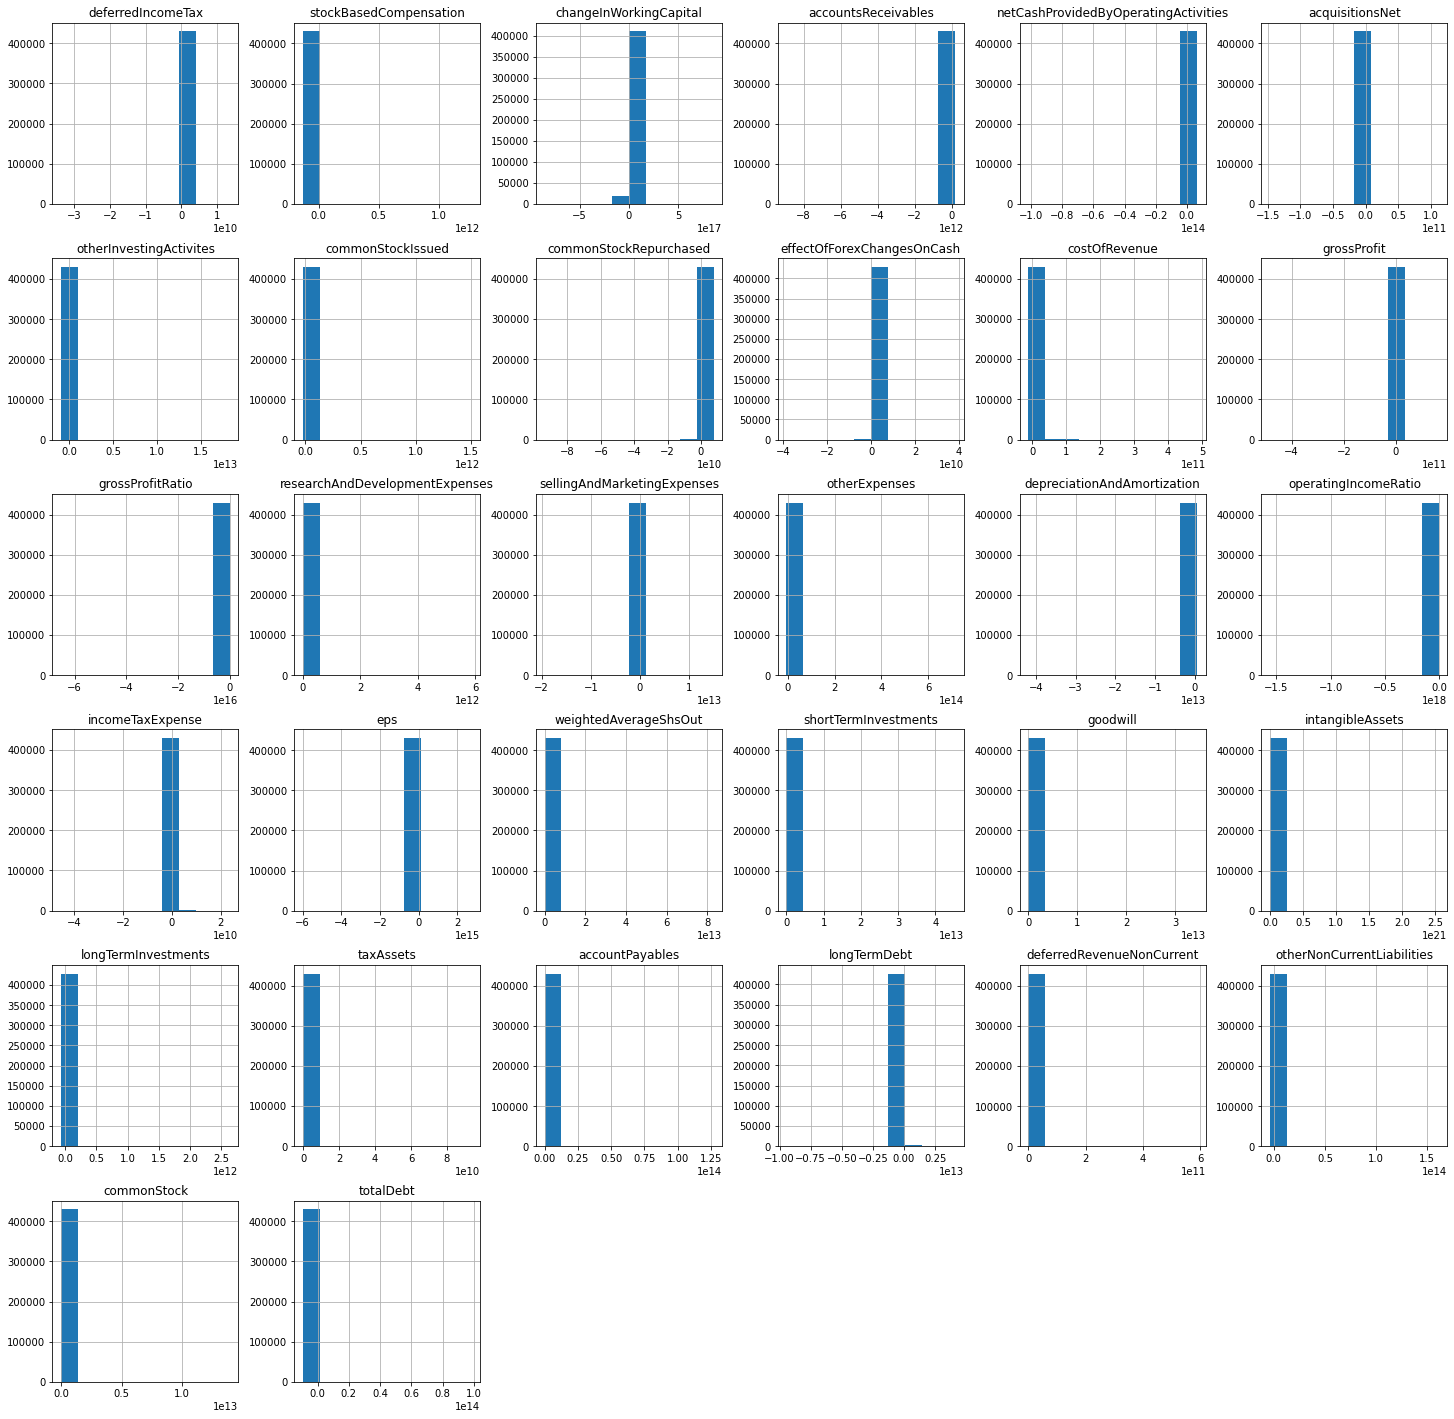

In [79]:
CombinedDataFrame.hist(figsize=(25,25))

# Make BoxPlots of Data
#### After the removal of outliers, these boxplots tells us the data remaining is mostly around zero.

<AxesSubplot:>

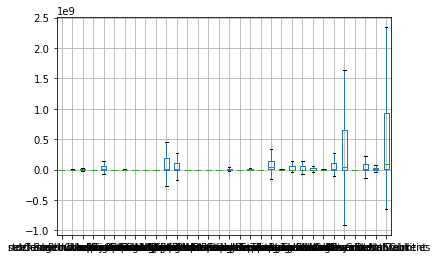

In [166]:
CombinedDataFrame.boxplot(showfliers=False)

# Make Classifier

In [46]:
#at this point, you've probably stopped and started your notebook already, so here's code for reimporting the new data
#import data
import numpy as np
import pandas as pd
StockPrices = pd.read_csv("ReducedStockData.csv",index_col=["symbol","date"],parse_dates=["date"],dtype={'date':str,"symbol":str,"close":float})
StockPrices = StockPrices.drop(columns=["is_above_market_average"])
CombinedDataFrame = pd.read_csv("ReducedCombinedFinancialRecords.csv",index_col=["symbol","date"],parse_dates=["date"])


#### 20,20,20,20,20 split classifier

In [47]:
#quantileDF = pd.DataFrame(index=StockPrices.index.get_level_values(1).unique())
#quantileDF.sort_index(inplace=True)
#quantileDF["0.2"] = StockPrices["percent_change_over_next_month"].groupby(level=1).quantile(0.2)
#quantileDF["0.4"] = StockPrices["percent_change_over_next_month"].groupby(level=1).quantile(0.4)
#quantileDF["0.6"] = StockPrices["percent_change_over_next_month"].groupby(level=1).quantile(0.6)
#quantileDF["0.8"] = StockPrices["percent_change_over_next_month"].groupby(level=1).quantile(0.8)

In [48]:
#create empty rating column
#StockPrices["rating"] = np.nan

In [49]:
#IndexValues = StockPrices.index.values
#i=0
#last_percent = 0
#while i < StockPrices.shape[0]:
#    price = StockPrices.at[IndexValues[i],"percent_change_over_next_month"]
#    if price <= quantileDF.at[IndexValues[i][1],"0.2"]:
#        StockPrices.at[IndexValues[i],"rating"] = 1     
#    elif price <= quantileDF.at[IndexValues[i][1],"0.4"]:
#        StockPrices.at[IndexValues[i],"rating"] = 2
#    elif price <= quantileDF.at[IndexValues[i][1],"0.6"]:
#        StockPrices.at[IndexValues[i],"rating"] = 3
#    elif price <= quantileDF.at[IndexValues[i][1],"0.8"]:
#        StockPrices.at[IndexValues[i],"rating"] = 4
#    elif price >= quantileDF.at[IndexValues[i][1],"0.8"]:
#        StockPrices.at[IndexValues[i],"rating"] = 5
#    percent_done = (i*100)//StockPrices.shape[0]
#    if percent_done > last_percent:
#        last_percent = percent_done
#        print("percent done: "+ str(percent_done))
#    i += 1

In [50]:
#Ratings = StockPrices.drop(columns=["percent_change_over_next_month"])

#### top 20% boolean split classifer

In [51]:
percent80 = StockPrices["percent_change_over_next_month"].groupby(level=1).quantile(0.8)

In [52]:
#create empty rating column
StockPrices["is_top_20_percent"] = np.nan

In [54]:
IndexValues = StockPrices.index.values

In [55]:
import time
last_percent = 0
i=0
length = StockPrices.shape[0]
lengthDiv100 = length/100
t1 = time.monotonic()
while i < StockPrices.shape[0]:
    price_change = StockPrices.iat[i,0]
    if price_change <= percent80.at[IndexValues[i][1]]:
        StockPrices.iat[i,1] = False  
    elif price_change > percent80.at[IndexValues[i][1]]:
        StockPrices.iat[i,1] = True
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0
percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
pe

In [57]:
Ratings = StockPrices.drop(columns=["percent_change_over_next_month"])

#### median boolean split classifier

In [58]:
averages = StockPrices["percent_change_over_next_month"].groupby(level=1).median()

In [59]:
#create empty rating column
StockPrices["is_above_market_average"] = np.nan

In [61]:
IndexValues = StockPrices.index.values

In [62]:
#simple will be above market average (bool)
import time
last_percent = 0
i=0
length = StockPrices.shape[0]
lengthDiv100 = length/100
t1 = time.monotonic()
while i < StockPrices.shape[0]:
    price_change = StockPrices.iat[i,0]
    if price_change <= averages.at[IndexValues[i][1]]:
        StockPrices.iat[i,1] = False  
    elif price_change > averages.at[IndexValues[i][1]]:
        StockPrices.iat[i,1] = True
    percent_done = i//lengthDiv100
    if percent_done > last_percent:
        last_percent = percent_done
        print("percent done: "+ str(percent_done))
    i += 1
t2 = time.monotonic()
print("time")
print(t2-t1)

percent done: 1.0
percent done: 2.0
percent done: 3.0
percent done: 4.0
percent done: 5.0
percent done: 6.0
percent done: 7.0
percent done: 8.0
percent done: 9.0
percent done: 10.0
percent done: 11.0
percent done: 12.0
percent done: 13.0
percent done: 14.0
percent done: 15.0
percent done: 16.0
percent done: 17.0
percent done: 18.0
percent done: 19.0
percent done: 20.0
percent done: 21.0
percent done: 22.0
percent done: 23.0
percent done: 24.0
percent done: 25.0
percent done: 26.0
percent done: 27.0
percent done: 28.0
percent done: 29.0
percent done: 30.0
percent done: 31.0
percent done: 32.0
percent done: 33.0
percent done: 34.0
percent done: 35.0
percent done: 36.0
percent done: 37.0
percent done: 38.0
percent done: 39.0
percent done: 40.0
percent done: 41.0
percent done: 42.0
percent done: 43.0
percent done: 44.0
percent done: 45.0
percent done: 46.0
percent done: 47.0
percent done: 48.0
percent done: 49.0
percent done: 50.0
percent done: 51.0
percent done: 52.0
percent done: 53.0
pe

In [63]:
Ratings = StockPrices.drop(columns=["percent_change_over_next_month"])

# Discretize Data
#### We use equal frequency to separate the data into bins with 86 values in them.

In [43]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5000, encode='ordinal', strategy='quantile')
CombinedDataFrame1 = pd.DataFrame(discretizer.fit_transform(CombinedDataFrame),index=CombinedDataFrame.index,columns=CombinedDataFrame.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. 

In [96]:
#getattr(discretizer,"bin_edges_")

# Plot Histograms of Combined Data
#### Ideally these distributions would be uniform, because we used equal frequency binning. However, values of 0 (and some just around 0) were extremely common (sometimes more common than the rest of the values combined). These values were so common they would span over multiple bins. Since the bin width would have been zero for these bins, the values simply went into one bin, which made our distributions non-uniform. This is not a problem, but we thought we should address why our data is not uniform given our technique and why we recieved so many errors during discretization.

array([[<AxesSubplot:title={'center':'deferredIncomeTax'}>,
        <AxesSubplot:title={'center':'stockBasedCompensation'}>,
        <AxesSubplot:title={'center':'changeInWorkingCapital'}>,
        <AxesSubplot:title={'center':'accountsReceivables'}>,
        <AxesSubplot:title={'center':'netCashProvidedByOperatingActivities'}>,
        <AxesSubplot:title={'center':'acquisitionsNet'}>],
       [<AxesSubplot:title={'center':'otherInvestingActivites'}>,
        <AxesSubplot:title={'center':'commonStockIssued'}>,
        <AxesSubplot:title={'center':'commonStockRepurchased'}>,
        <AxesSubplot:title={'center':'effectOfForexChangesOnCash'}>,
        <AxesSubplot:title={'center':'costOfRevenue'}>,
        <AxesSubplot:title={'center':'grossProfit'}>],
       [<AxesSubplot:title={'center':'grossProfitRatio'}>,
        <AxesSubplot:title={'center':'researchAndDevelopmentExpenses'}>,
        <AxesSubplot:title={'center':'sellingAndMarketingExpenses'}>,
        <AxesSubplot:title={'center':

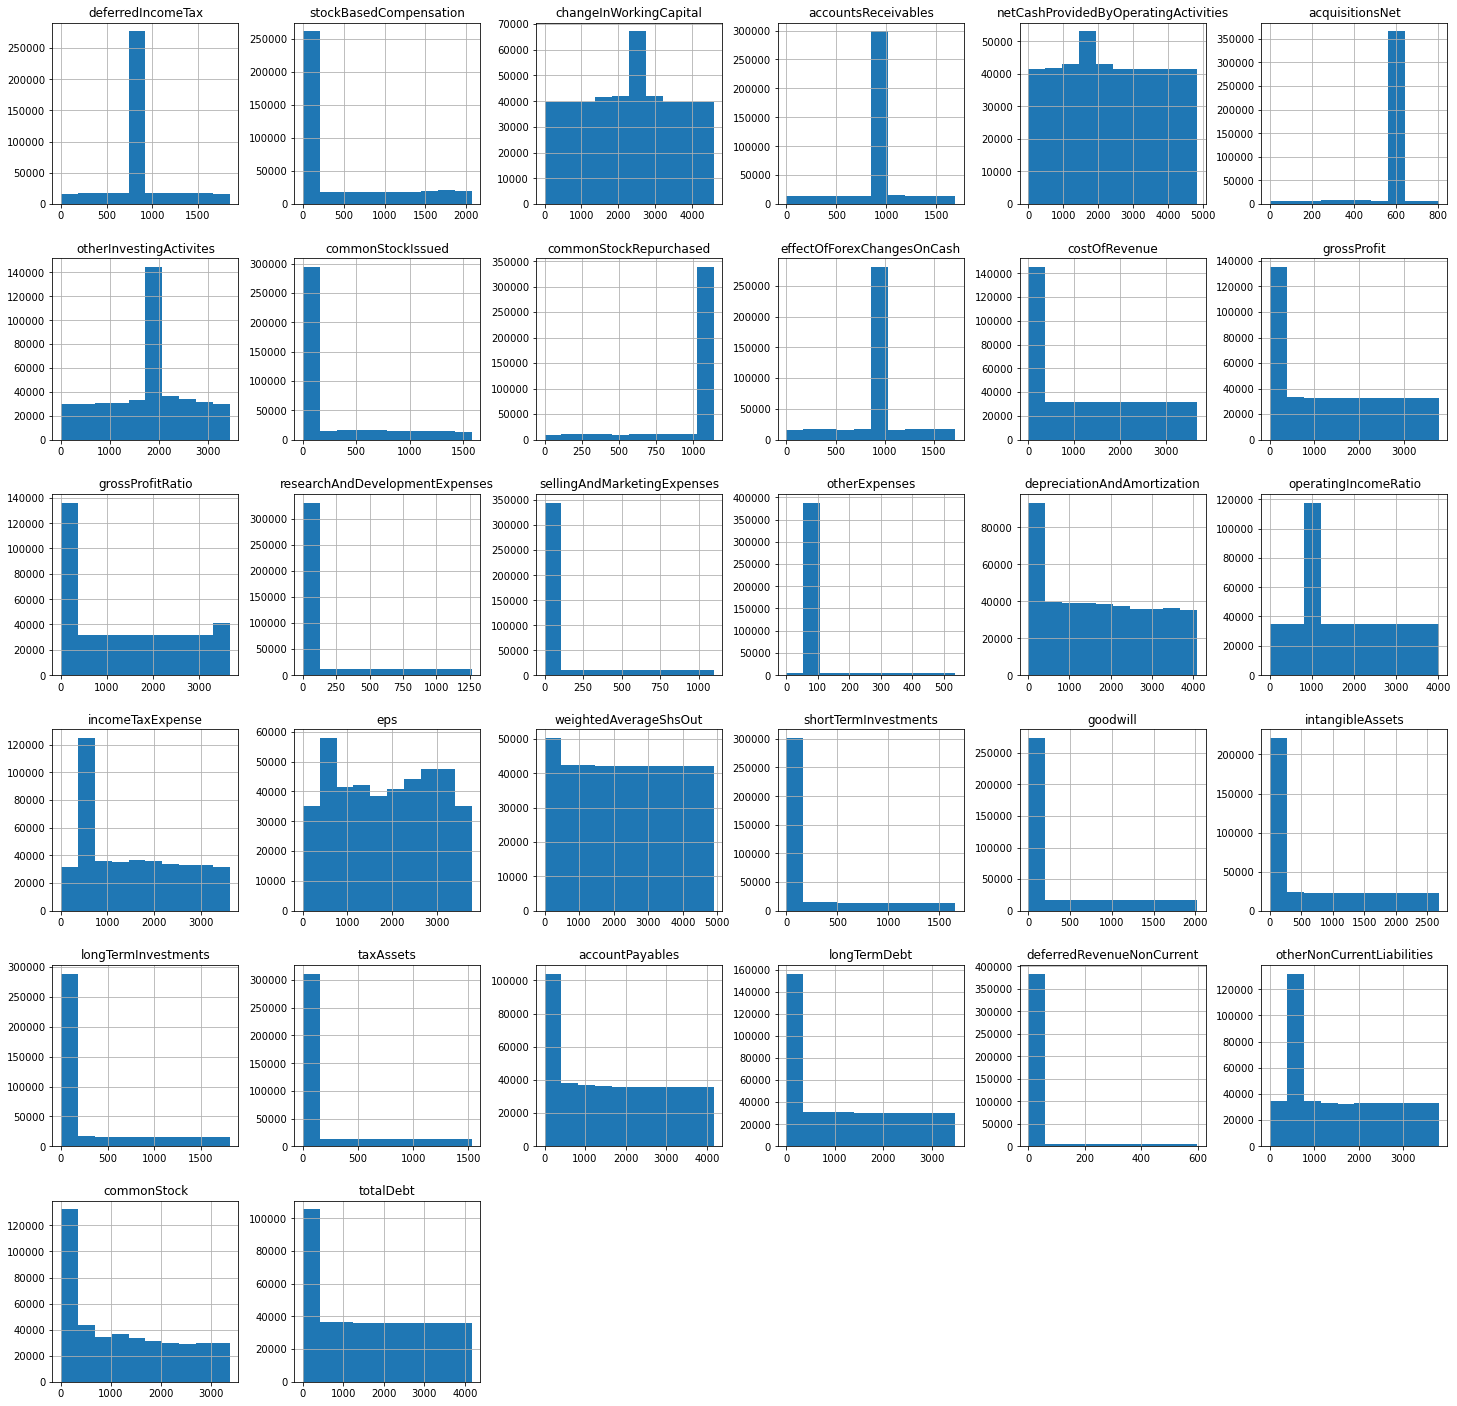

In [99]:
CombinedDataFrame1.hist(figsize=(25,25))

# Join Finincial Records with Created Rating and Save File

In [65]:
CombinedDataFrame1 = CombinedDataFrame1.join(Ratings,on=["symbol","date"],how="inner")

In [70]:
CombinedDataFrame1

deferredIncomeTax  stockBasedCompensation  \
symbol date                                                    
CMCSA  2021-09-30             1847.0                  2055.0   
       2021-06-30             1850.0                  2056.0   
       2021-03-31             1657.0                  2057.0   
       2020-12-31               20.0                  2053.0   
       2020-09-30               45.0                  2055.0   
...                              ...                     ...   
STC.V  2003-12-31              875.0                    56.0   
       2003-09-30              878.0                    56.0   
       2003-06-30              849.0                    56.0   
       2003-03-31              849.0                    56.0   
       2002-12-31              849.0                    56.0   

                   changeInWorkingCapital  \
symbol date                                 
CMCSA  2021-09-30                    48.0   
       2021-06-30                  3101.0   
       2021-03-31                  4479.0   
       2020-12-31                   269.0   
       2020-09-30                    72.0   
...                                   ...   
STC.V  2003-12-31                  2297.0   
       2003-09-30                  2280.0   
       2003-06-30                  2635.0   
       2003-03-31                  2125.0   
       2002-12-31                  2242.0   

                   netCashProvidedByOperatingActivities  acquisitionsNet  \
symbol date                                                                
CMCSA  2021-09-30                                4785.0            295.0   
       2021-06-30                                4794.0             67.0   
       2021-03-31                                4795.0             90.0   
       2020-12-31                                4776.0             93.0   
       2020-09-30                                4777.0             57.0   
...                                                 ...              ...   
STC.V  2003-12-31                                1624.0            615.0   
       2003-09-30                                1582.0            615.0   
       2003-06-30                                1677.0            615.0   
       2003-03-31                                1525.0            615.0   
       2002-12-31                                1558.0            615.0   

                   otherInvestingActivites  commonStockRepurchased  \
symbol date                                                          
CMCSA  2021-09-30                     42.0                  1089.0   
       2021-06-30                     42.0                  1089.0   
       2021-03-31                     46.0                  1089.0   
       2020-12-31                     34.0                  1089.0   
       2020-09-30                     38.0                  1089.0   
...                                    ...                     ...   
STC.V  2003-12-31                   1856.0                  1089.0   
       2003-09-30                   1828.0                  1089.0   
       2003-06-30                   2252.0                  1089.0   
       2003-03-31                   1712.0                  1089.0   
       2002-12-31                   1822.0                  1089.0   

                   effectOfForexChangesOnCash  costOfRevenue  grossProfit  \
symbol date                                                                 
CMCSA  2021-09-30                       270.0         3606.0       3787.0   
       2021-06-30                      1624.0         3598.0       3786.0   
       2021-03-31                        83.0         3595.0       3784.0   
       2020-12-31                       130.0         3599.0       3784.0   
       2020-09-30                      1688.0         3592.0       3782.0   
...                                       ...            ...          ...   
STC.V  2003-12-31                       876.0          183.0        407.0   
       

In [69]:
CombinedDataFrame1.to_csv('CombinedDataFrameTop20.csv')

In [82]:
Positives = CombinedDataFrame1[CombinedDataFrame1["is_top_20_percent"]==0].sample(int(CombinedDataFrame1["is_top_20_percent"].shape[0]/5))
CombinedDataFrame2 = Positives.append(CombinedDataFrame1[CombinedDataFrame1["is_top_20_percent"]==1])

In [84]:
CombinedDataFrame2["is_top_20_percent"].mean()

0.500148192918122

In [85]:
CombinedDataFrame2.to_csv('CombinedDataFrameTop20equalDist.csv')